In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [11]:

# Loads the data from the URL and creates a DataFrame
df = pd.read_csv("./Project Datasets/honeyproduction.csv")

In [12]:
# Groups the data by year to calculate the average honey production.
prod_by_year = df.groupby('year').totalprod.mean().reset_index()

In [13]:
# Reshapes the year data for the regression model.
X = prod_by_year["year"]
X = X.values.reshape(-1, 1)
y = prod_by_year["totalprod"]

In [14]:
# Fits a linear regression model using scikit-learn.
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [15]:
# Predicts historical honey production.
#print(regr.coef_,regr.intercept_)
y_predict = regr.predict(X)
#print(y_predict)

In [16]:
# Predicts future honey production.
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)
#print(X_future)
future_predict = regr.predict(X_future)
print(future_predict)

[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829
 2747337.8303659  2659034.64121351 2570731.45206112 2482428.26290876
 2394125.07375637 2305821.88460398 2217518.69545159 2129215.50629923
 2040912.31714684 1952609.12799445 1864305.93884209 1776002.7496897
 1687699.56053731 1599396.37138492 1511093.18223256 1422789.99308017
 1334486.80392778 1246183.61477539 1157880.42562303 1069577.23647064
  981274.04731825  892970.85816586  804667.6690135   716364.47986111
  628061.29070872  539758.10155633  451454.91240397  363151.72325158
  274848.53409919  186545.34494683]


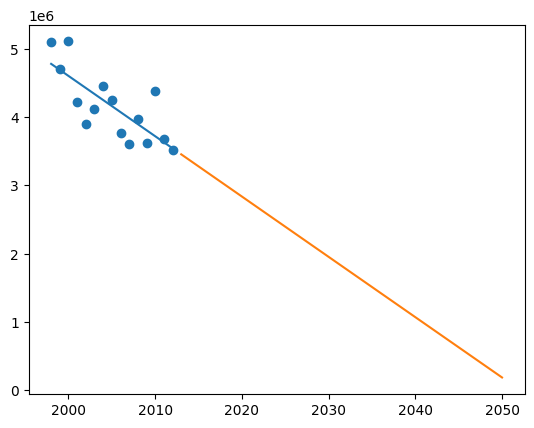

In [17]:
# Plots both the historical data and the future predictions.
plt.scatter(X,y)
plt.plot(X,y_predict)
plt.plot(X_future, future_predict)
plt.show()